In [3]:
import pandas as pd
# Load the dataset
weatherData = pd.read_csv('/content/weather_classification_data.csv')
# Display the first few rows of the dataset
weatherData.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
weatherData.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


<Axes: xlabel='Weather Type'>

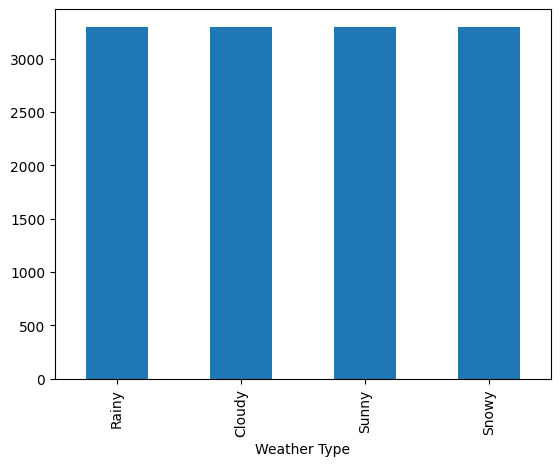

In [ ]:
weatherData['Weather Type'].value_counts().plot(kind='bar')

Encoding Categorical columns to numerical columns because Machine learning models like Random Forest and Logistic Regression can not work directly with categorical (string/text) data.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
label_encoders = {}
for column in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    le = LabelEncoder()
    weatherData[column] = le.fit_transform(weatherData[column])
    label_encoders[column] = le  # Store encoders if you need to reverse the encoding later

# Step 3: Feature Scaling
# Select only numerical columns for scaling
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

scaler = StandardScaler()
weatherData[numerical_columns] = scaler.fit_transform(weatherData[numerical_columns])

# The dataset is now preprocessed and ready for model implementation
print(weatherData.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0    -0.294931  0.212404   -0.048086           0.887629            3   
1     1.143035  1.351385   -0.192836           0.543291            3   
2     0.625367 -0.233285   -0.409962          -1.178401            0   
3     1.085516  0.707613   -1.206089           0.887629            0   
4     0.452811  0.261924    1.037543           0.386773            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0              0.134203 -0.520104       3        -0.582231         1   
1              0.150602  0.776424       1         1.345768         1   
2              0.346579  0.257813       1         0.010999         2   
3              0.549008  0.776424       1        -1.323769         0   
4             -0.407490 -0.779410       3        -0.878846         2   

   Weather Type  
0             1  
1             0  
2             3  
3             3  
4             1  


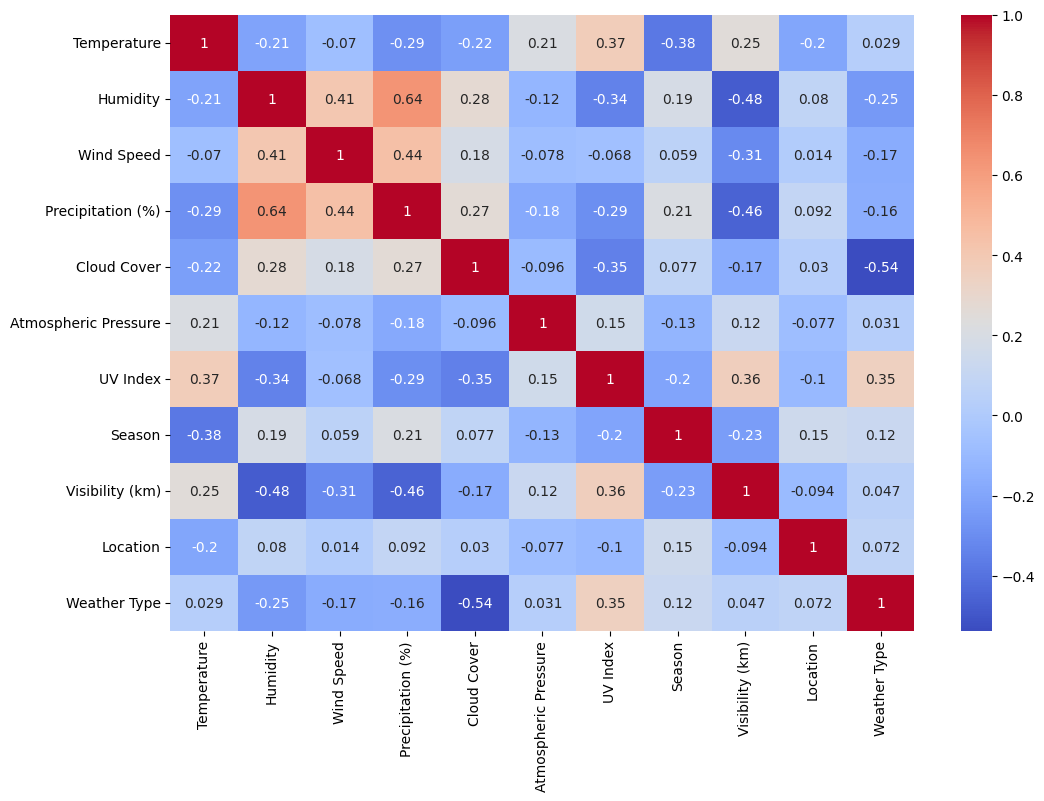

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a correlation matrix
corr_matrix = weatherData.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

  Applying Decision tree, Logistic Regression, Random Froest and comparing tresults

Random Forest Accuracy: 0.9116161616161617
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       955
           1       0.90      0.92      0.91       982
           2       0.93      0.93      0.93      1033
           3       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



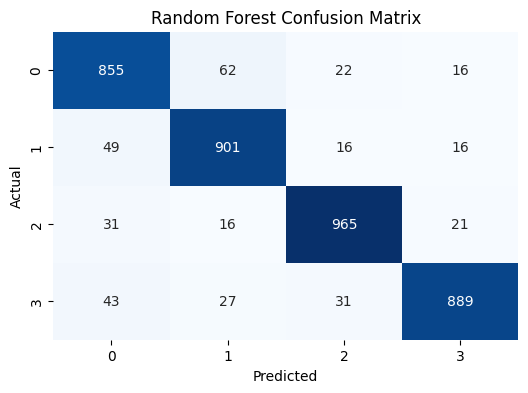

Logistic Regression Accuracy: 0.8497474747474747
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       955
           1       0.84      0.85      0.85       982
           2       0.88      0.94      0.91      1033
           3       0.87      0.79      0.83       990

    accuracy                           0.85      3960
   macro avg       0.85      0.85      0.85      3960
weighted avg       0.85      0.85      0.85      3960



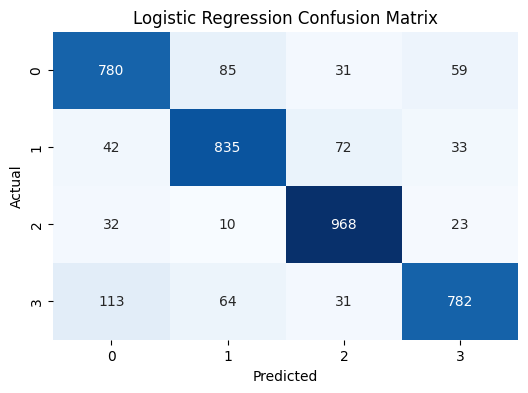

Decision Tree Accuracy: 0.9007575757575758
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       955
           1       0.89      0.89      0.89       982
           2       0.93      0.93      0.93      1033
           3       0.90      0.91      0.90       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



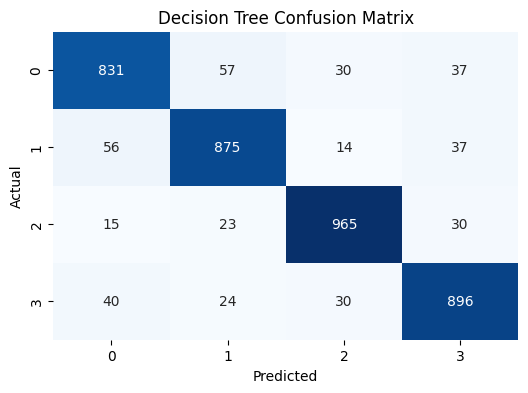

Random Forest performed better with an accuracy of 0.9116


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the variable 'weatherData'
# and 'Weather Type' is the target variable.

# Split into features (X) and target (y)
X = weatherData.drop('Weather Type', axis=1)  # Assuming 'Weather Type' is the target variable
y = weatherData['Weather Type']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model 3: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_preds)
plt.figure(figsize=(6,4))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 4: Compare Results
best_model = max([('Random Forest', rf_accuracy), ('Logistic Regression', lr_accuracy), ('Decision Tree', dt_accuracy)], key=lambda x: x[1])
print(f"{best_model[0]} performed better with an accuracy of {best_model[1]:.4f}")


#Fine-Tuning Decision Tree Algorithm

First method is to change the loss function and predict the output. Our first loss function is *entropy accuracy*

In [7]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
dt_entropy_preds = dt_entropy.predict(X_test)
dt_entropy_accuracy = accuracy_score(y_test, dt_entropy_preds)
print(f"Entropy Decision Tree Accuracy: {dt_entropy_accuracy}")
print("Entropy Decision Tree Classification Report:\n", classification_report(y_test, dt_entropy_preds))


Entropy Decision Tree Accuracy: 0.9058080808080808
Entropy Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       955
           1       0.91      0.89      0.90       982
           2       0.93      0.94      0.93      1033
           3       0.92      0.90      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

# Fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
dt_preds = dt.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Generate classification report
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))



Decision Tree Accuracy: 0.9007575757575758
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       955
           1       0.89      0.89      0.89       982
           2       0.93      0.93      0.93      1033
           3       0.90      0.91      0.90       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

